In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv("TelcoCustomerChurn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1862,0523-VNGTF,Female,1,No,No,52,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,50.50,2566.3,No
4994,9692-TUSXH,Female,0,No,No,18,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.05,1740.7,Yes
3902,5999-LCXAO,Female,0,No,No,1,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.90,29.9,No
3353,4536-PLEQY,Male,0,Yes,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
6978,6439-PKTRR,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Electronic check,80.70,5617.95,No


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
pd.to_numeric(df.TotalCharges, errors ="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
df1 = df[df.TotalCharges !=' ']
df1.shape

(7032, 21)

In [17]:
pd.to_numeric(df1.TotalCharges)
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [30]:
df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1.TotalCharges)
df1.dtypes.TotalCharges

dtype('float64')

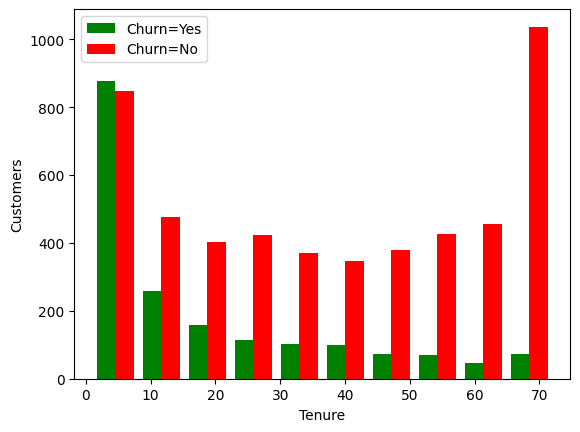

In [38]:
tenuresOfNoChurns = df1[df1.Churn=='No'].tenure
tenuresOfYesChurns = df1[df1.Churn=='Yes'].tenure

plt.hist([tenuresOfYesChurns, tenuresOfNoChurns], color=['green', 'red'],label=['Churn=Yes','Churn=No'])

plt.ylabel("Customers")
plt.xlabel("Tenure")

plt.legend()

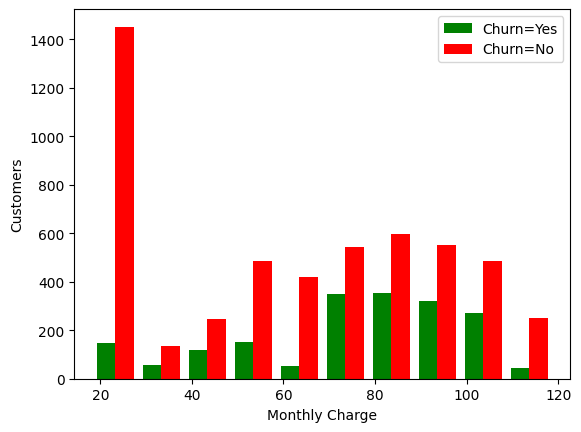

In [41]:
tenuresOfNoChurns = df1[df1.Churn=='No'].MonthlyCharges
tenuresOfYesChurns = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([tenuresOfYesChurns, tenuresOfNoChurns], color=['green', 'red'],label=['Churn=Yes','Churn=No'])

plt.ylabel("Customers")
plt.xlabel("Monthly Charge")

plt.legend()

In [61]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [62]:
print_unique_col_values(df1)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [59]:
df1.loc[: 'MultipleLines'] = df1.loc[: 'MultipleLines'].replace('No internet service', 'No')
df1.loc[: 'PhoneService'] = df1.loc[: 'PhoneService'].replace('No phone service', 'No', )

In [63]:
print_unique_col_values(df1)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [90]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
df1[yes_no_cols].replace({'Yes': 1, 'No': 0})
df1.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [85]:
df1['gender'].replace({'Female':1, 'Male':0})

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64

In [86]:
df1['gender'].unique()

array([1, 0])

In [125]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [126]:
df2.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1624,2929-QNSRW,1,0,1,0,56,1,1,0,1,...,False,True,False,False,True,False,False,False,True,False
6166,4077-CROMM,1,0,1,1,31,1,1,0,0,...,False,True,False,True,False,False,False,False,True,False
5786,8661-BOYNW,1,0,1,0,72,1,1,1,0,...,True,False,False,False,False,True,False,True,False,False
2318,6463-HHXJR,1,0,1,1,71,1,1,1,1,...,False,True,False,False,False,True,True,False,False,False
1738,8646-JCOMS,1,0,1,0,66,1,1,0,1,...,False,True,False,False,True,False,True,False,False,False


In [127]:
df2 = df2.drop('customerID', axis='columns')

In [128]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [132]:
bool_Cols = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No','Contract_Month-to-month',
            'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
            'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
df2.loc[:, bool_Cols] = df2.loc[:, bool_Cols].replace({True: 1, False: 0}).astype(int)
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [143]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [144]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2916,0,0,0,0,0.704225,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1358,0,0,0,0,0.126761,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
5629,0,1,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
279,1,0,0,0,0.056338,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
3436,0,0,0,0,0.338028,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [145]:
x = df2.drop('Churn', axis ='columns')
y = df2['Churn']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [150]:
X_train.shape

(5625, 26)

In [151]:
X_test.shape

(1407, 26)

In [152]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [153]:
len(X_train.columns)

26

In [155]:
pip install tensorflow 

  Using cached tensorflow-2.15.0-cp39-cp39-macosx_10_15_x86_64.whl.metadata (4.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.9 MB/s eta 0:00:00
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 7.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 9.7 MB/s eta 0:00:00:00:01

In [163]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(20, input_shape=(26,), activation='relu'),
        #keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
    ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7248
Epoch 2/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4310 - accuracy: 0.7961
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8005
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8076
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8060
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8053
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8060
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8064
Epoch 9/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8087
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8091

In [164]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4422 - accuracy: 0.7925


[0.4421907663345337, 0.7924662232398987]

In [165]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.22714503],
       [0.38654667],
       [0.00928448],
       [0.7159226 ],
       [0.5293661 ]], dtype=float32)

In [166]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [167]:
y_pred = []
for element in yp:
    if element > 0.5: 
        y_pred.append(1)
    else:
        y_pred.append(0)

In [169]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [170]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [171]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.68      0.53      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

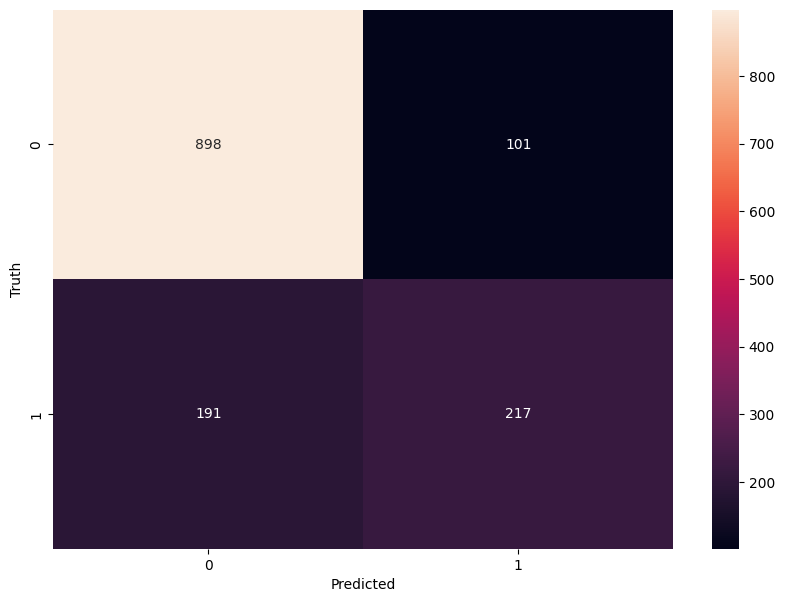

In [175]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')